In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import FreqDist
#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')


In [2]:
data1 = pd.read_csv('car models and brands (3).csv')
data2 = pd.read_csv('sample data.csv')

In [3]:
data1.head()

,Brand,Model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx


In [4]:
data2.head()

,brightness04,6-Oct,""" kia hyundai under-achieving "" kia hyundai and "" kia hyundai over-achieving "" kia hyundai are relative terms . . . boy i learned that lesson in school, the hard way. lol. achieving top 20% income level as early as the late-20's is quite impressive. keep in mind however the average income earner do not buy the average-priced new car . . . the avearge income households buy used car . it's really quite tough to afford a car that costs more 30-50% of the buyer's annual income at the time of purchase, unless the buyer is still living off parents or something. a typical car cost 50% of its purchase-time price in the three years after acquisition, through depreciation, interest payment, taxes, insurance, etc.. that means roughly 16% of income each year for someone acquiring a car that is priced at 50% of his income . . . that means roughly 30% of after-tax income each year for the first three years, for someone who buys a $40k car on an $80k income. that's just not manageable for most households. lease subsidies, and manufacturers' rebates that do not get reflected in the lease residual can change the numbers significantly . . . but neither is available for bmw at this time."
0,kdshapiro,6-Oct,""" kia hyundai most bmw's owners paid for t..."
1,fedlawman,6-Oct,""" kia hyundai it's not a matter of "" ki..."
2,rockylee,6-Oct,""" kia hyundai under-achieving "" kia hyun..."
3,rockylee,6-Oct,i have 2 friends that own 3 series. i drove b...
4,oldcem,6-Oct,"neither can the bmw 325is, 2.0t audi s, etc...."


In [5]:
data2.columns = ['Username','date','text']

In [6]:
data2.head()

,Username,date,text
0,kdshapiro,6-Oct,""" kia hyundai most bmw's owners paid for t..."
1,fedlawman,6-Oct,""" kia hyundai it's not a matter of "" ki..."
2,rockylee,6-Oct,""" kia hyundai under-achieving "" kia hyun..."
3,rockylee,6-Oct,i have 2 friends that own 3 series. i drove b...
4,oldcem,6-Oct,"neither can the bmw 325is, 2.0t audi s, etc...."


In [7]:
def build_corpus(text_col):
    """To build a text corpus by stitching all the records together.Input the text column"""
    corpus = ""
    for sent in text_col:
        corpus += sent
    return corpus

In [8]:
#Building the corpus
corpus = build_corpus(data2['text'])

In [9]:
#Converting all the words into lowercase
corpus = corpus.lower()

In [10]:
#Splitting the entire corpus
corpus = corpus.split()

In [11]:
def plot_word_frequency(words,top_n=10):
    """Function to plot the word frequencies"""
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(15,5))
    plt.title("Most Frequent Words in the Corpus - Including STOPWORDS")
    plt.ylabel("Count")
    plt.xlabel("Word")
    plt.xticks(rotation=90)
    plot = sns.barplot(labels,counts)
    return plot

<AxesSubplot:title={'center':'Most Frequent Words in the Corpus - Including STOPWORDS'}, xlabel='Word', ylabel='Count'>

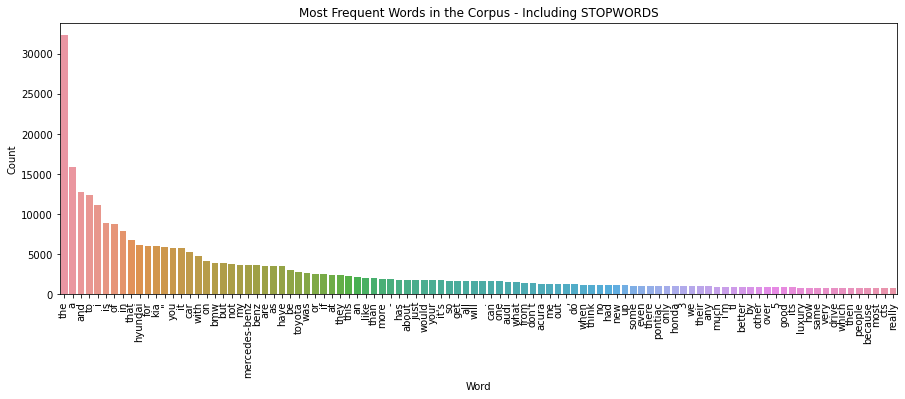

In [12]:
plot_word_frequency(corpus,100)

In [13]:
### Answer 2

In [14]:
top_10_barnds = data1.Brand.value_counts().index[:10]
top_10_barnds

Index(['toyota', 'chevrolet', 'honda', 'hyundai', 'mazda', 'suzuki', 'ford',
       'bmw', 'subaru', 'pontiac'],
      dtype='object')

In [15]:
## Count dictionary
brand_model_dict = {}
for model, brand in zip(data1.Model.values,data1.Brand.values):
    model = model.lower()
    brand_model_dict[model]=brand

In [37]:
text_data = data2.text.values

In [39]:
## Replacing the model with brand name
for i in range(len(text_data)):
    temp_data = text_data[i].lower()
    for key in brand_model_dict:
        if key in temp_data:
            temp_data = temp_data.replace(key,brand_model_dict[key])
    text_data[i] = temp_data


In [42]:
data2['text_updated'] = text_data

In [44]:
data2.head()

,A,date,text,text_updated
0,kdshapiro,6-Oct,""" kia hyundai most bmw's owners paid for t...",""" kia hyundai most bmw's owners paid for t..."
1,fedlawman,6-Oct,""" kia hyundai it's not a matter of "" ki...",""" kia hyundai it's not a matter of "" ki..."
2,rockylee,6-Oct,""" kia hyundai under-achieving "" kia hyun...",""" kia hyundai under-achieving "" kia hyun..."
3,rockylee,6-Oct,i have 2 friends that own 3 series. i drove b...,i have 2 friends that own 3 series. i drove b...
4,oldcem,6-Oct,"neither can the bmw 325is, 2.0t audi s, etc....","neither can the bmw 325is, 2.0t audi s, etc...."


In [ ]:
### 3 part

In [57]:
## Calculating the lift ratio for top 10 brand without repeating
lift_dict={}
total_shape = data2.shape[0]
for i in range(len(top_10_barnds)):
    for j in range(i,len(top_10_barnds)):
        brand_1 = top_10_barnds[i]
        brand_2 = top_10_barnds[j]
        count_1 = 0
        count_2 = 0
        count_3 = 0
        for txt in data2.text_updated.values:
            if brand_1 in txt and brand_2 in txt:
                count_3 = count_3 + 1
            elif brand_1 in txt and brand_2 not in txt:
                count_1 = count_1 + 1 
            elif brand_1 not in txt and brand_2 in txt:
                count_2 = count_2 + 1
        pa = count_1/total_shape
        pb = count_2/total_shape
        pab = count_3/total_shape
        ans = (pa*pb)/pab
        lift_dict[(brand_1,brand_2)] = round(ans,3)



        




In [58]:
lift_dict = sorted(lift_dict.items(),key=lambda kv : kv[1],reverse=True)
lift_dict = {val[0]:val[1] for val in lift_dict}
lift_dict

{('bmw', 'nissan'): 0.592,
 ('hyundai', 'subaru'): 0.521,
 ('hyundai', 'suzuki'): 0.496,
 ('bmw', 'subaru'): 0.461,
 ('hyundai', 'mazda'): 0.457,
 ('chevrolet', 'bmw'): 0.455,
 ('chevrolet', 'honda'): 0.453,
 ('chevrolet', 'subaru'): 0.394,
 ('hyundai', 'nissan'): 0.363,
 ('ford', 'subaru'): 0.359,
 ('suzuki', 'ford'): 0.356,
 ('honda', 'subaru'): 0.348,
 ('subaru', 'nissan'): 0.348,
 ('toyota', 'subaru'): 0.339,
 ('mazda', 'bmw'): 0.337,
 ('honda', 'ford'): 0.331,
 ('honda', 'bmw'): 0.32,
 ('hyundai', 'ford'): 0.32,
 ('toyota', 'ford'): 0.315,
 ('mazda', 'ford'): 0.313,
 ('ford', 'nissan'): 0.288,
 ('chevrolet', 'hyundai'): 0.287,
 ('chevrolet', 'nissan'): 0.286,
 ('honda', 'mazda'): 0.283,
 ('honda', 'hyundai'): 0.282,
 ('ford', 'bmw'): 0.281,
 ('toyota', 'mazda'): 0.275,
 ('honda', 'nissan'): 0.273,
 ('chevrolet', 'mazda'): 0.263,
 ('toyota', 'nissan'): 0.257,
 ('toyota', 'chevrolet'): 0.248,
 ('mazda', 'nissan'): 0.241,
 ('hyundai', 'bmw'): 0.24,
 ('toyota', 'bmw'): 0.232,
 ('chevr